In [134]:
import numpy as np
from sklearn.model_selection import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)


*Adım 1: scoutium_attributes.csv ve scoutium_potential_labels.csv dosyalarını okutunuz.
*

In [135]:
df = pd.read_csv("/kaggle/input/sco-talent/scoutium_attributes.csv", delimiter=";")

df2 = pd.read_csv("/kaggle/input/sco-talent/scoutium_potential_labels.csv", delimiter=";")

Adım 2: Okutmuş olduğumuz csv dosyalarını merge fonksiyonunu kullanarak birleştiriniz.
("task_response_id", 'match_id', 'evaluator_id' "player_id" 4 adet değişken üzerinden birleştirme işlemini gerçekleştiriniz.)



In [136]:
df=pd.merge(df,df2,how='left',on=["task_response_id",'match_id', 'evaluator_id',"player_id"])

Adım 3: position_id içerisindeki Kaleci (1) sınıfını veri setinden kaldırınız.


In [137]:
df.loc[df['position_id'] !=1]

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average
...,...,...,...,...,...,...,...,...,...
10725,5642,63032,151191,1909728,7,12825756,4357,67.0,highlighted
10726,5642,63032,151191,1909728,7,12825756,4407,78.0,highlighted
10727,5642,63032,151191,1909728,7,12825756,4408,67.0,highlighted
10728,5642,63032,151191,1909728,7,12825756,4423,67.0,highlighted


Adım 4: potential_label içerisindeki below_average sınıfını veri setinden kaldırınız.( below_average sınıfı tüm verisetinin %1'ini oluşturur)


In [138]:
df = df.loc[~(df["potential_label"]=="below_average")]


In [139]:
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average


Adım 5: Oluşturduğunuz veri setinden “pivot_table” fonksiyonunu kullanarak bir tablo oluşturunuz. Bu pivot table'da her satırda bir oyuncu olacak şekilde manipülasyon yapınız.
Görevler
Adım 1: İndekste “player_id”,“position_id” ve “potential_label”, sütunlarda “attribute_id” ve değerlerde scout’ların oyunculara verdiği puan
“attribute_value” olacak şekilde pivot table’ı oluşturunuz.




In [140]:
pt = pd.pivot_table(df, values="attribute_value", columns="attribute_id", index=["player_id","position_id","potential_label"])


In [141]:
pt

attribute_id                           4322  4323  4324  4325  4326  4327  4328  4329  4330  4332  4333  4335  4336  4337  4338  4339  4340  4341  4342  4343  4344  4345  4346  4347  4348  4349  4350  4351  4352  4353  4354  4355  4356  4357  4407  4408  4409  4423  4426
player_id position_id potential_label                                                                                                                                                                                                                                          
1355710   7           average          50.5  50.5  34.0  50.5  45.0  45.0  45.0  45.0  50.5  56.0  39.5  34.0   NaN   NaN  39.5  39.5  45.0  45.0  50.5  28.5  23.0  39.5   NaN   NaN  28.5  28.5  45.0  50.5  56.0  34.0  39.5  50.5  34.0  34.0  56.0  34.0   NaN  34.0  56.0
1356362   9           average          67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0   NaN   NaN  67.0  67.0  67.0  67.0  67.0  67.0  56.0  67.0   NaN   NaN  67.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0   NaN  56.0  78.0
1356375   3           average          67.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0  56.0   NaN   NaN  67.0  67.0  67.0  67.0  67.0  56.0  56.0  67.0   NaN   NaN  67.0  56.0  56.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0   NaN  56.0  78.0
          4           average          67.0  78.0  67.0  67.0  67.0  78.0  78.0  78.0  56.0  67.0  67.0  67.0   NaN   NaN  78.0  78.0  56.0  67.0  67.0  45.0  45.0  56.0   NaN   NaN  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  56.0  67.0  56.0  67.0   NaN  45.0  56.0
1356411   9           average          67.0  67.0  78.0  78.0  67.0  67.0  67.0  67.0  89.0  78.0  67.0  67.0   NaN   NaN  67.0  56.0  56.0  67.0  78.0  56.0  56.0  67.0   NaN   NaN  56.0  67.0  56.0  67.0  67.0  56.0  67.0  67.0  56.0  67.0  89.0  56.0   NaN  67.0  78.0
...                                     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
1907347   5           average          67.0  78.0  78.0  56.0  78.0  67.0  78.0  67.0  56.0  78.0  78.0  56.0   NaN   NaN  67.0  67.0  78.0  56.0  67.0  56.0  56.0  67.0   NaN   NaN  78.0  89.0  67.0  78.0  67.0  67.0  67.0  67.0  56.0  67.0  78.0  78.0   NaN  78.0  56.0
          6           average          67.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0  56.0   NaN   NaN  67.0  67.0  67.0  67.0  78.0  67.0  56.0  67.0   NaN   NaN  67.0  67.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0   NaN  67.0  78.0
1909532   10          average          56.0  45.0  45.0  45.0  56.0  56.0  56.0  56.0  23.0  23.0  34.0  45.0   NaN   NaN  56.0  34.0  23.0  45.0  45.0  23.0  23.0  34.0   NaN   NaN  23.0  23.0  34.0  23.0  45.0  45.0  56.0  34.0  34.0  56.0  34.0  34.0   NaN  34.0  23.0
1909724   2           highlighted      78.0  78.0  78.0  78.0  78.0  78.0  78.0  78.0  67.0  67.0  78.0  78.0   NaN   NaN  78.0  67.0  78.0  67.0  78.0  56.0  56.0  78.0   NaN   NaN  78.0  67.0  78.0  78.0  78.0  78.0  78.0  67.0  67.0  67.0  78.0  78.0   NaN  67.0  78.0
1909728   7           highlighted      78.0  67.0  67.0  78.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0  67.0   NaN   NaN  78.0  67.0  67.0  78.0  78.0  67.0  56.0  78.0   NaN   NaN  67.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  78.0  67.0   NaN  67.0  78.0

[297 rows x 39 columns]

reset_index” fonksiyonunu kullanarak index hatasından kurtulunuz ve “attribute_id” sütunlarının isimlerini stringe çeviriniz. (df.columns.map(str))


In [142]:
pt = pt.reset_index(drop=False)
pt.columns

pt.columns = pt.columns.map(str)

In [143]:
pt.columns

Index(['player_id', 'position_id', 'potential_label', '4322', '4323', '4324', '4325', '4326', '4327', '4328', '4329', '4330', '4332', '4333', '4335', '4336', '4337', '4338', '4339', '4340', '4341', '4342', '4343', '4344', '4345', '4346', '4347', '4348', '4349', '4350', '4351', '4352', '4353', '4354', '4355', '4356', '4357', '4407', '4408', '4409', '4423', '4426'], dtype='object', name='attribute_id')

In [144]:
num_cols = pt.columns[3:]


In [145]:
num_cols

Index(['4322', '4323', '4324', '4325', '4326', '4327', '4328', '4329', '4330', '4332', '4333', '4335', '4336', '4337', '4338', '4339', '4340', '4341', '4342', '4343', '4344', '4345', '4346', '4347', '4348', '4349', '4350', '4351', '4352', '4353', '4354', '4355', '4356', '4357', '4407', '4408', '4409', '4423', '4426'], dtype='object', name='attribute_id')

In [146]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
 

check_df(pt)


##################### Shape #####################
(297, 42)
##################### Types #####################
attribute_id
player_id            int64
position_id          int64
potential_label     object
4322               float64
4323               float64
4324               float64
4325               float64
4326               float64
4327               float64
4328               float64
4329               float64
4330               float64
4332               float64
4333               float64
4335               float64
4336               float64
4337               float64
4338               float64
4339               float64
4340               float64
4341               float64
4342               float64
4343               float64
4344               float64
4345               float64
4346               float64
4347               float64
4348               float64
4349               float64
4350               float64
4351               float64
4352               float64
4353         

In [147]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in ["position_id","potential_label"]:
    cat_summary(pt, col)


             position_id      Ratio
position_id                        
2                     53  17.845118
6                     41  13.804714
10                    29   9.764310
7                     28   9.427609
3                     26   8.754209
1                     26   8.754209
8                     25   8.417508
4                     24   8.080808
5                     23   7.744108
9                     22   7.407407
##########################################
                 potential_label      Ratio
potential_label                            
average                      236  79.461279
highlighted                   61  20.538721
##########################################


count    297.000000
mean      58.481481
std       14.487456
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       56.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4322, dtype: float64


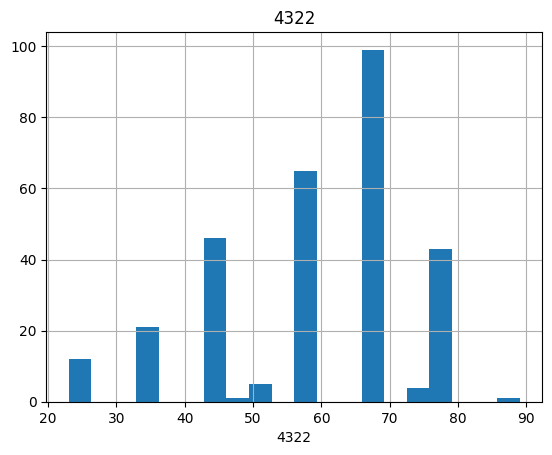

count    297.000000
mean      58.845679
std       14.820486
min       23.000000
5%        34.000000
10%       40.600000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       72.500000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4323, dtype: float64


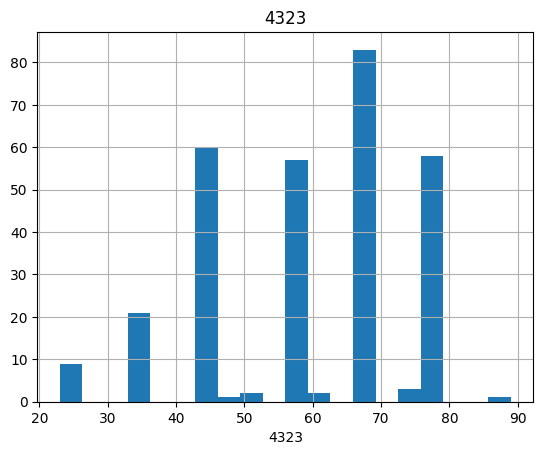

count    297.000000
mean      55.932099
std       15.997043
min       23.000000
5%        34.000000
10%       34.000000
20%       34.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4324, dtype: float64


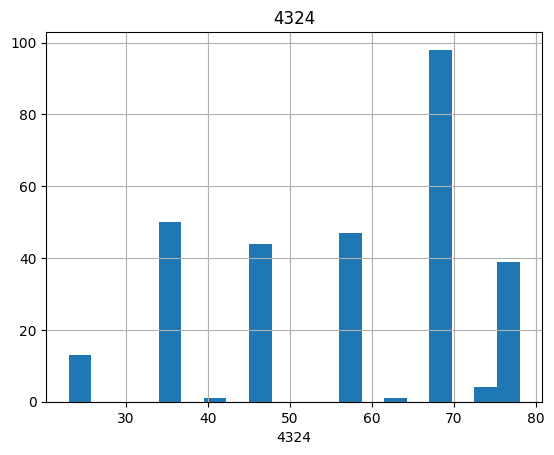

count    297.000000
mean      56.703704
std       14.779362
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4325, dtype: float64


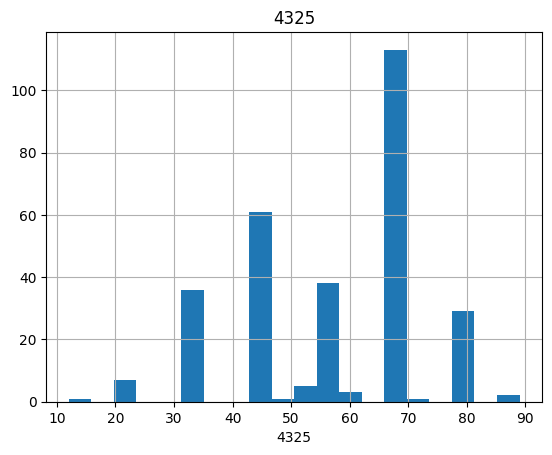

count    297.000000
mean      56.160494
std       14.890153
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       61.500000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4326, dtype: float64


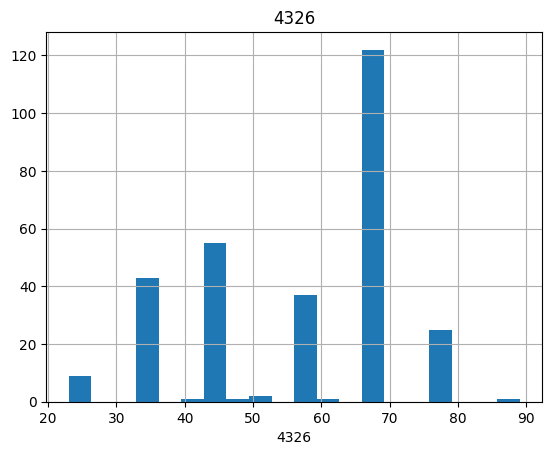

count    297.000000
mean      56.611111
std       14.528985
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4327, dtype: float64


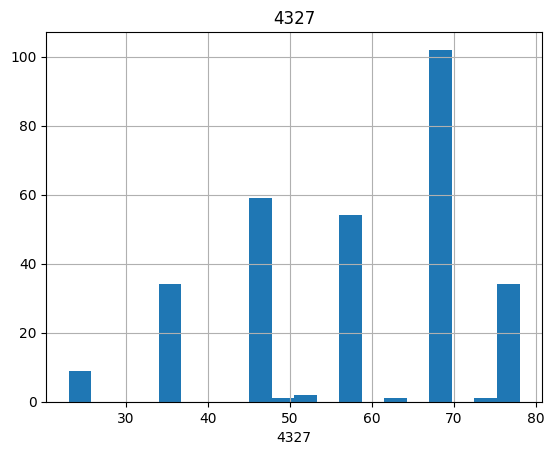

count    297.000000
mean      58.246914
std       14.736137
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4328, dtype: float64


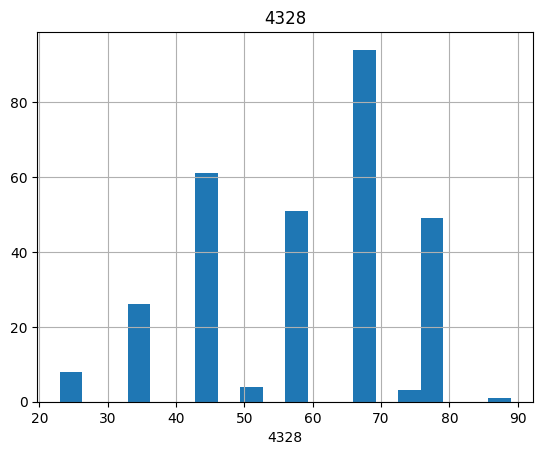

count    297.000000
mean      59.450617
std       18.240464
min       12.000000
5%        23.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       67.000000
60%       67.000000
70%       78.000000
80%       78.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4329, dtype: float64


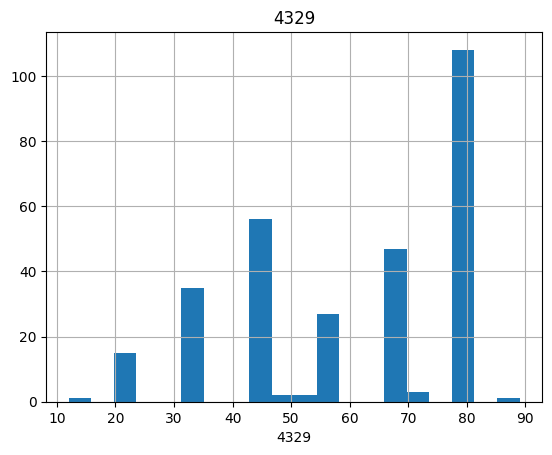

count    297.000000
mean      56.481481
std       14.079486
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       49.400000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       89.000000
Name: 4330, dtype: float64


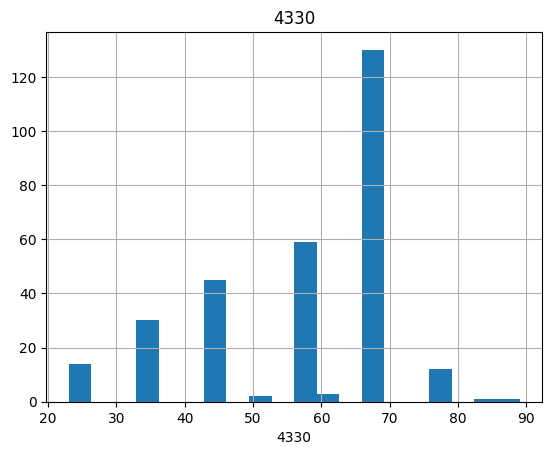

count    297.000000
mean      57.660494
std       13.511481
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       56.000000
40%       56.000000
50%       61.500000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4332, dtype: float64


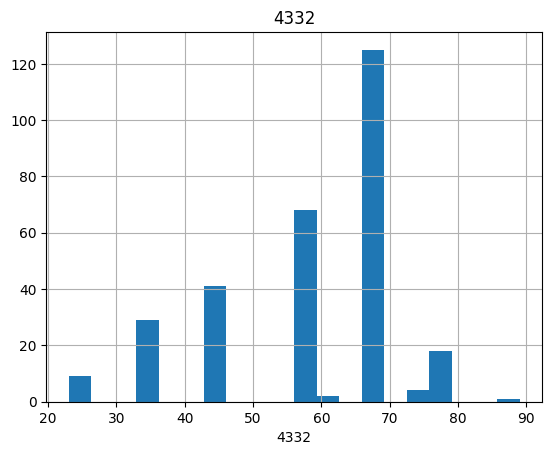

count    271.000000
mean      59.497540
std       16.369983
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       56.000000
40%       56.000000
50%       67.000000
60%       67.000000
70%       72.500000
80%       78.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4333, dtype: float64


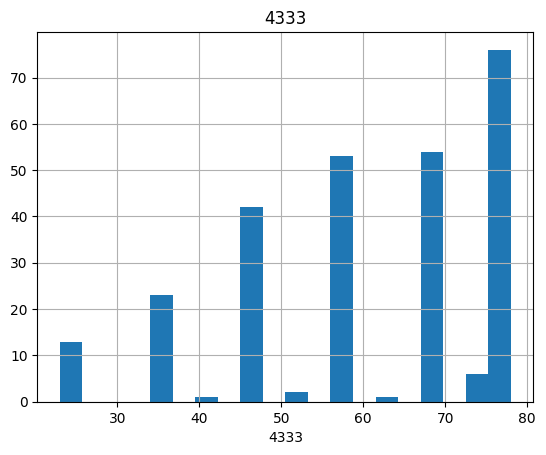

count    271.000000
mean      50.817958
std       16.269353
min       12.000000
5%        23.000000
10%       34.000000
20%       34.000000
30%       34.000000
40%       45.000000
50%       56.000000
60%       56.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       89.000000
Name: 4335, dtype: float64


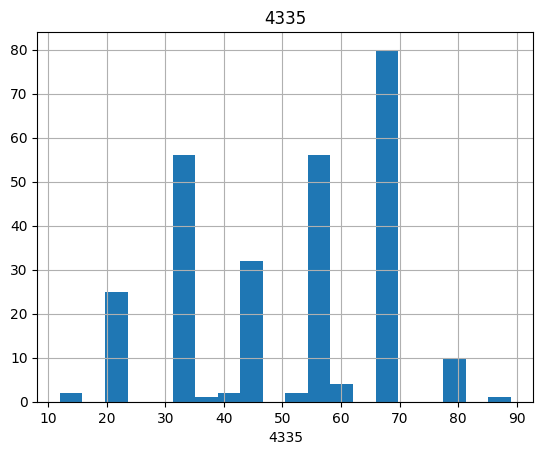

count    26.000000
mean     54.730769
std      16.559125
min      23.000000
5%       34.000000
10%      34.000000
20%      34.000000
30%      45.000000
40%      56.000000
50%      56.000000
60%      67.000000
70%      67.000000
80%      67.000000
90%      72.500000
95%      78.000000
99%      78.000000
max      78.000000
Name: 4336, dtype: float64


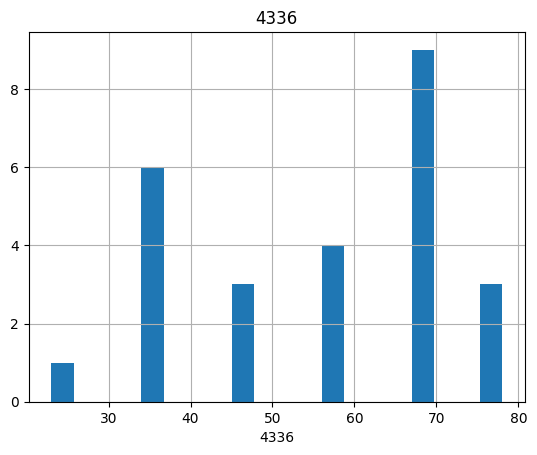

count    26.000000
mean     55.012821
std      16.448838
min      23.000000
5%       25.750000
10%      34.000000
20%      34.000000
30%      48.666667
40%      56.000000
50%      56.000000
60%      67.000000
70%      67.000000
80%      67.000000
90%      72.500000
95%      78.000000
99%      78.000000
max      78.000000
Name: 4337, dtype: float64


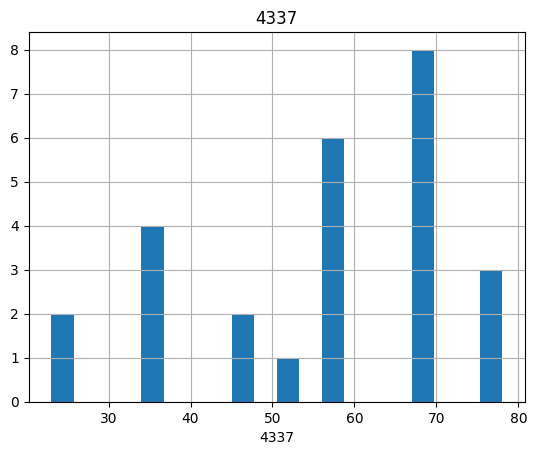

count    297.000000
mean      56.895062
std       15.789714
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4338, dtype: float64


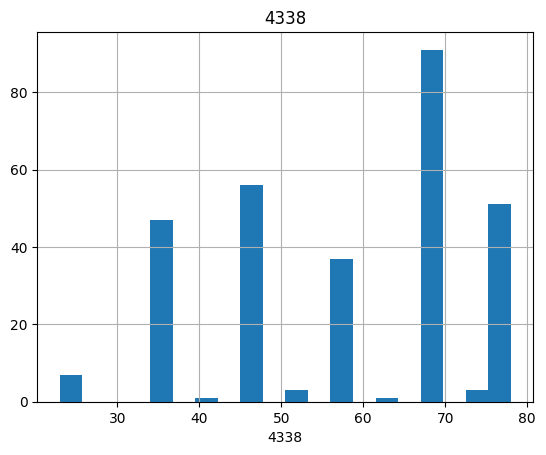

count    271.000000
mean      54.504920
std       14.894394
min       23.000000
5%        28.500000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4339, dtype: float64


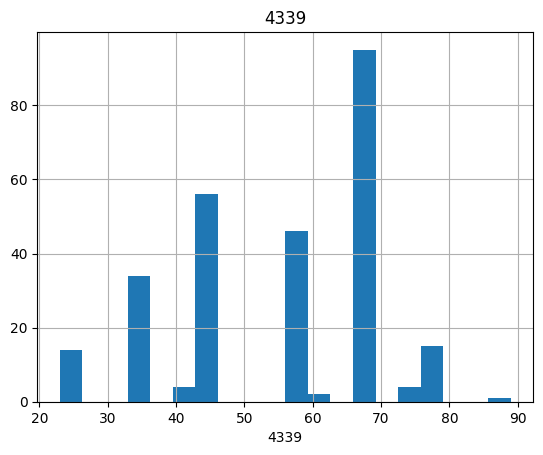

count    271.000000
mean      53.199262
std       15.161445
min       12.000000
5%        23.000000
10%       34.000000
20%       34.000000
30%       45.000000
40%       45.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       78.000000
Name: 4340, dtype: float64


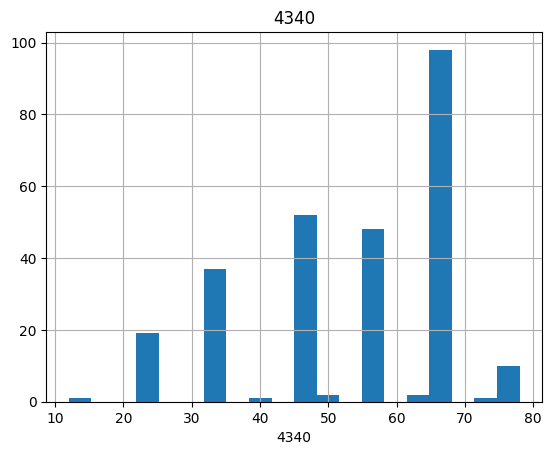

count    271.000000
mean      55.194957
std       14.794589
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4341, dtype: float64


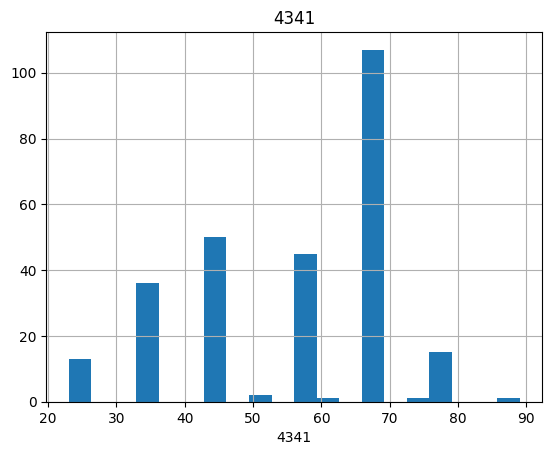

count    297.000000
mean      57.907407
std       14.821281
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       67.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4342, dtype: float64


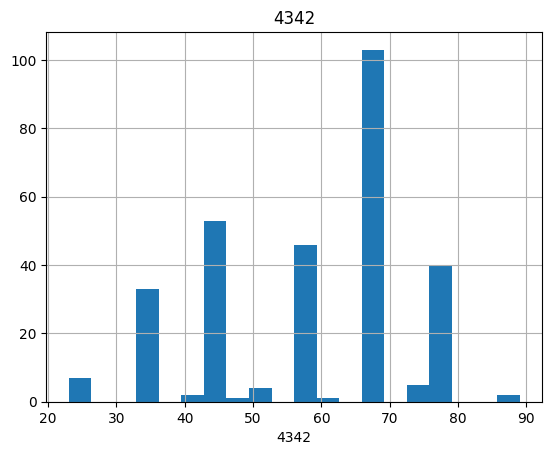

count    271.000000
mean      46.386839
std       16.790151
min       12.000000
5%        23.000000
10%       23.000000
20%       23.000000
30%       34.000000
40%       45.000000
50%       45.000000
60%       56.000000
70%       56.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       74.150000
max       89.000000
Name: 4343, dtype: float64


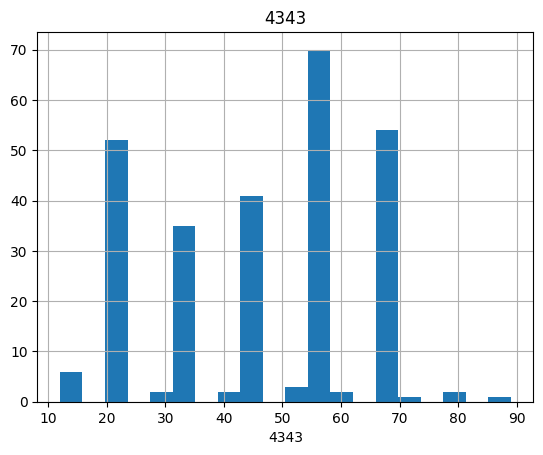

count    271.000000
mean      43.349323
std       16.909239
min       12.000000
5%        23.000000
10%       23.000000
20%       23.000000
30%       34.000000
40%       34.000000
50%       45.000000
60%       56.000000
70%       56.000000
80%       56.000000
90%       56.000000
95%       67.000000
99%       78.000000
max      100.000000
Name: 4344, dtype: float64


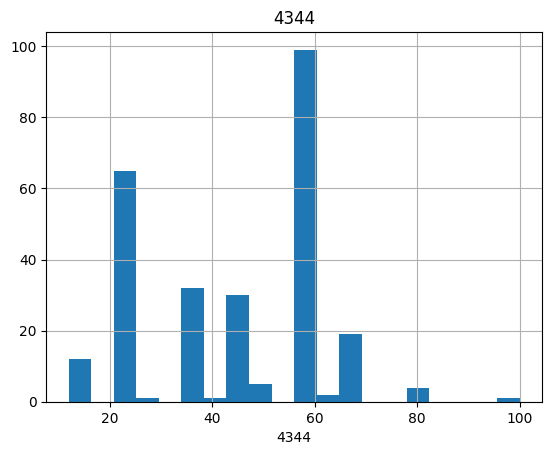

count    271.000000
mean      55.316728
std       15.768308
min       23.000000
5%        28.500000
10%       34.000000
20%       34.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       83.500000
Name: 4345, dtype: float64


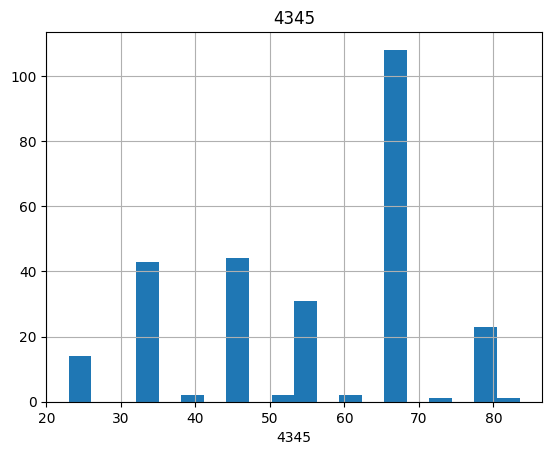

count    26.000000
mean     52.897436
std      15.089295
min      23.000000
5%       25.750000
10%      34.000000
20%      34.000000
30%      45.000000
40%      56.000000
50%      56.000000
60%      56.000000
70%      67.000000
80%      67.000000
90%      67.000000
95%      67.000000
99%      75.250000
max      78.000000
Name: 4346, dtype: float64


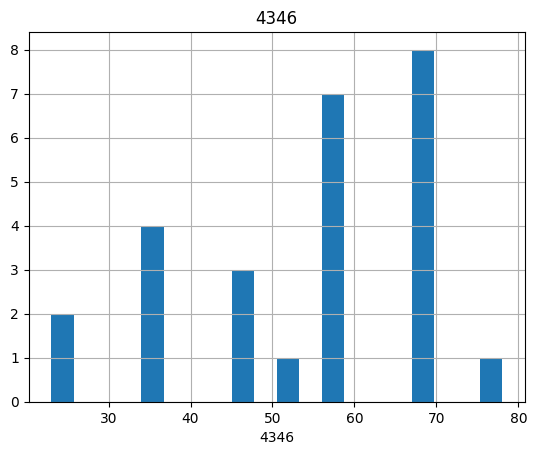

count    26.000000
mean     57.692308
std      17.515180
min      23.000000
5%       25.750000
10%      34.000000
20%      34.000000
30%      56.000000
40%      56.000000
50%      67.000000
60%      67.000000
70%      67.000000
80%      67.000000
90%      78.000000
95%      78.000000
99%      78.000000
max      78.000000
Name: 4347, dtype: float64


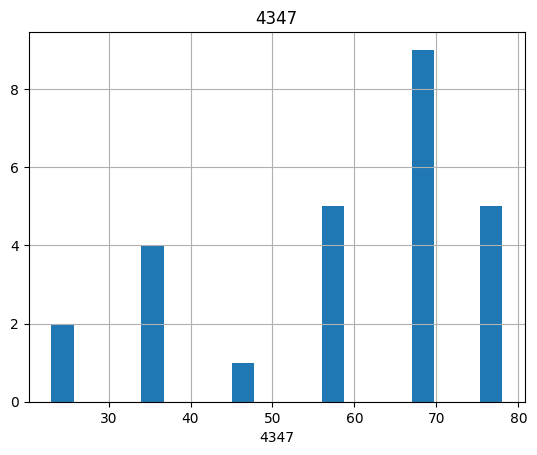

count    271.000000
mean      51.568881
std       17.591752
min       12.000000
5%        23.000000
10%       23.000000
20%       34.000000
30%       34.000000
40%       45.000000
50%       56.000000
60%       61.500000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4348, dtype: float64


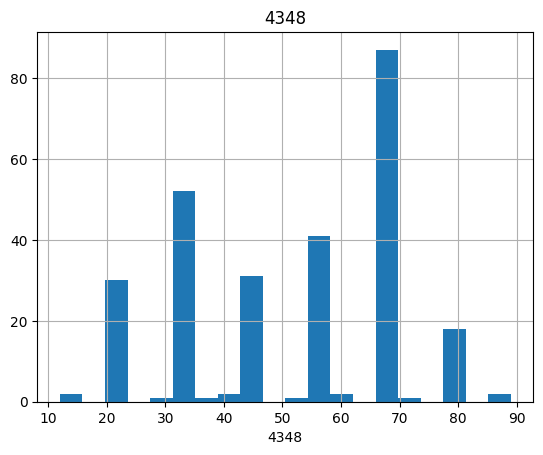

count    271.000000
mean      45.236777
std       16.095356
min       12.000000
5%        23.000000
10%       23.000000
20%       23.000000
30%       34.000000
40%       45.000000
50%       45.000000
60%       56.000000
70%       56.000000
80%       56.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       89.000000
Name: 4349, dtype: float64


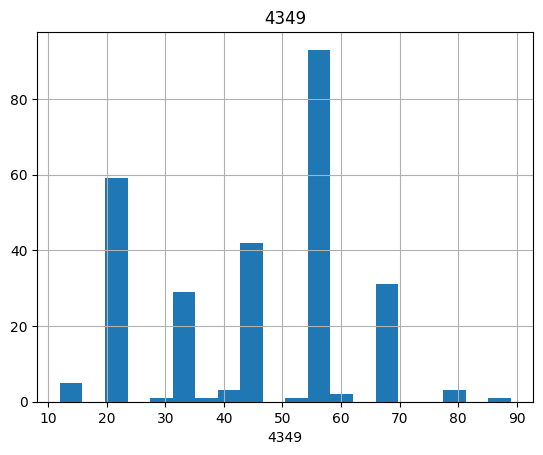

count    297.000000
mean      54.820988
std       14.526706
min       12.000000
5%        31.800000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       78.000000
Name: 4350, dtype: float64


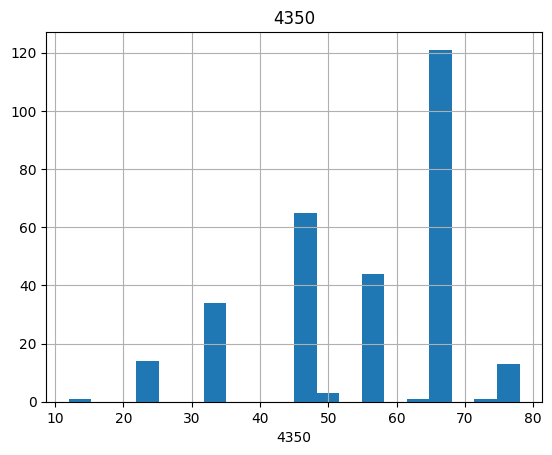

count    271.000000
mean      56.737392
std       14.344484
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max      100.000000
Name: 4351, dtype: float64


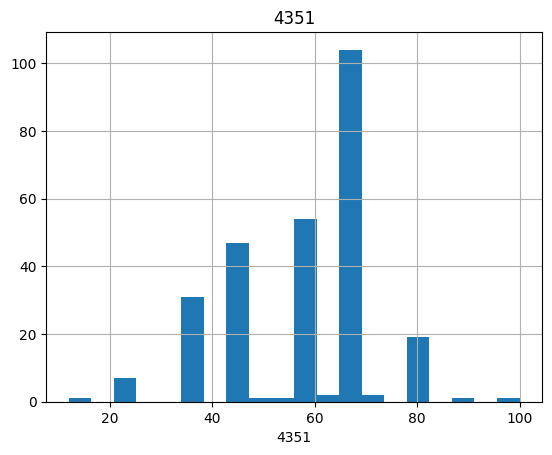

count    297.000000
mean      55.820988
std       14.193008
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       69.200000
99%       78.000000
max       78.000000
Name: 4352, dtype: float64


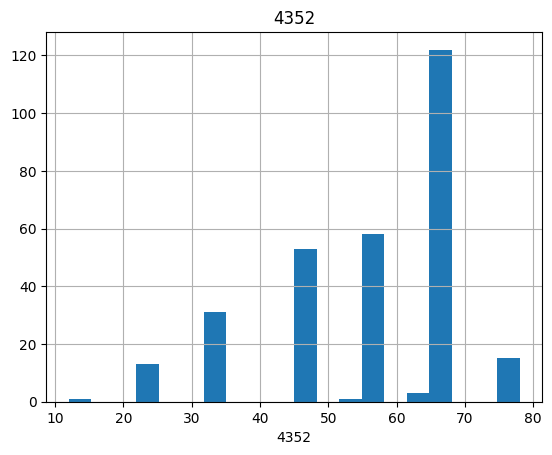

count    297.000000
mean      54.555556
std       15.526991
min       12.000000
5%        34.000000
10%       34.000000
20%       34.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4353, dtype: float64


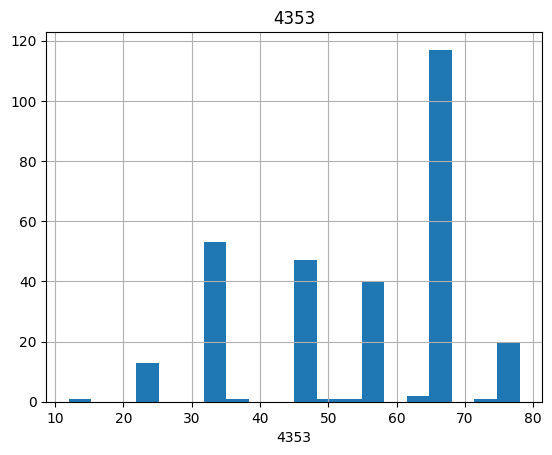

count    297.000000
mean      59.160494
std       17.889878
min       12.000000
5%        31.800000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       78.000000
80%       78.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4354, dtype: float64


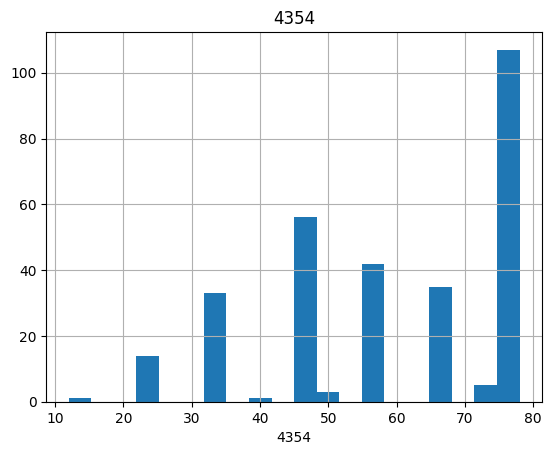

count    297.000000
mean      57.345679
std       14.822993
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4355, dtype: float64


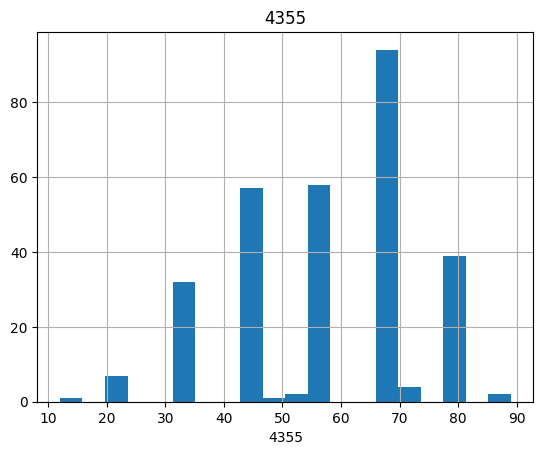

count    271.000000
mean      52.955720
std       15.378794
min       23.000000
5%        23.000000
10%       34.000000
20%       34.000000
30%       45.000000
40%       45.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       78.000000
Name: 4356, dtype: float64


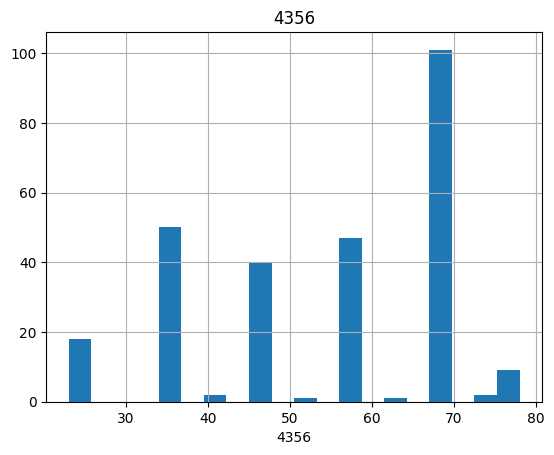

count    297.000000
mean      55.888889
std       14.649201
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       67.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4357, dtype: float64


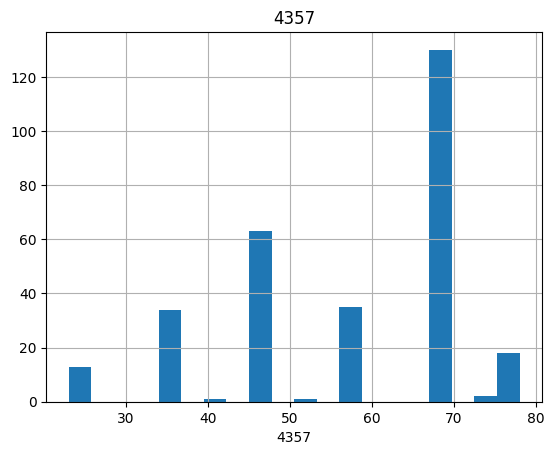

count    271.000000
mean      58.333948
std       16.391679
min        1.000000
5%        28.500000
10%       34.000000
20%       45.000000
30%       56.000000
40%       56.000000
50%       67.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       89.000000
max      100.000000
Name: 4407, dtype: float64


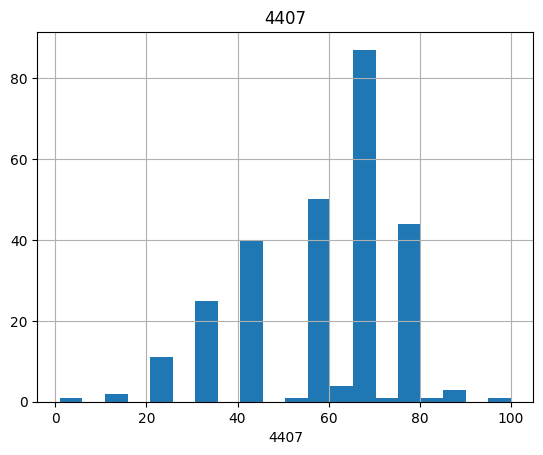

count    271.000000
mean      56.764453
std       15.334661
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4408, dtype: float64


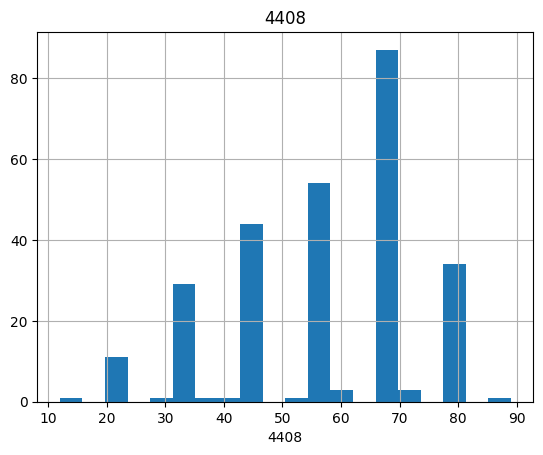

count    26.000000
mean     57.269231
std      16.559125
min      23.000000
5%       25.750000
10%      34.000000
20%      45.000000
30%      50.500000
40%      56.000000
50%      56.000000
60%      67.000000
70%      67.000000
80%      67.000000
90%      78.000000
95%      78.000000
99%      78.000000
max      78.000000
Name: 4409, dtype: float64


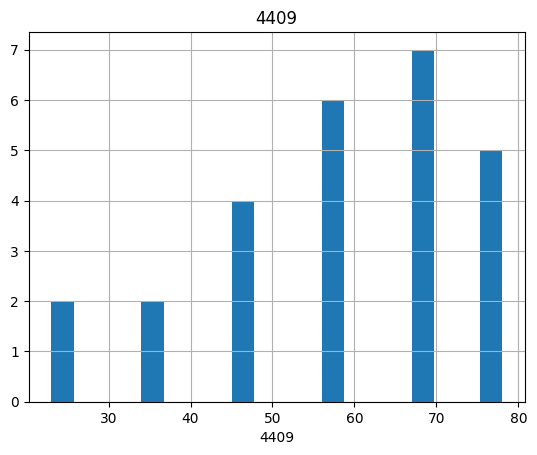

count    297.000000
mean      49.308642
std       16.116201
min       23.000000
5%        23.000000
10%       23.000000
20%       34.000000
30%       34.000000
40%       45.000000
50%       56.000000
60%       56.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       78.000000
Name: 4423, dtype: float64


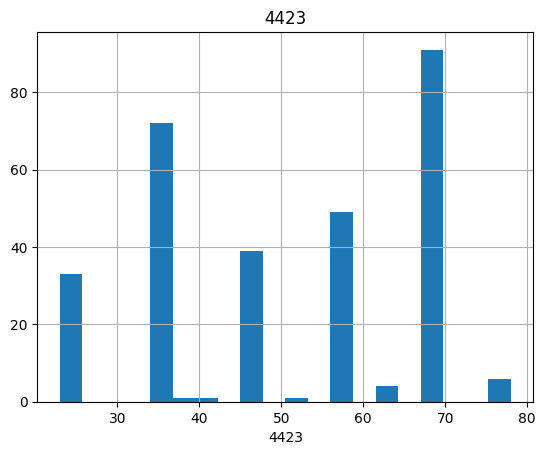

count    297.000000
mean      60.030864
std       17.101948
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       78.000000
80%       78.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4426, dtype: float64


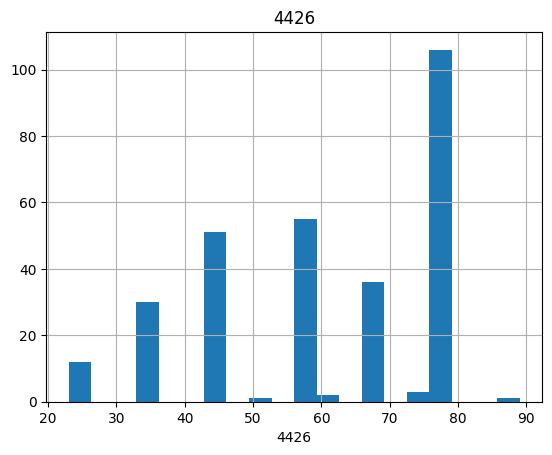

In [148]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(pt, col, plot=True)

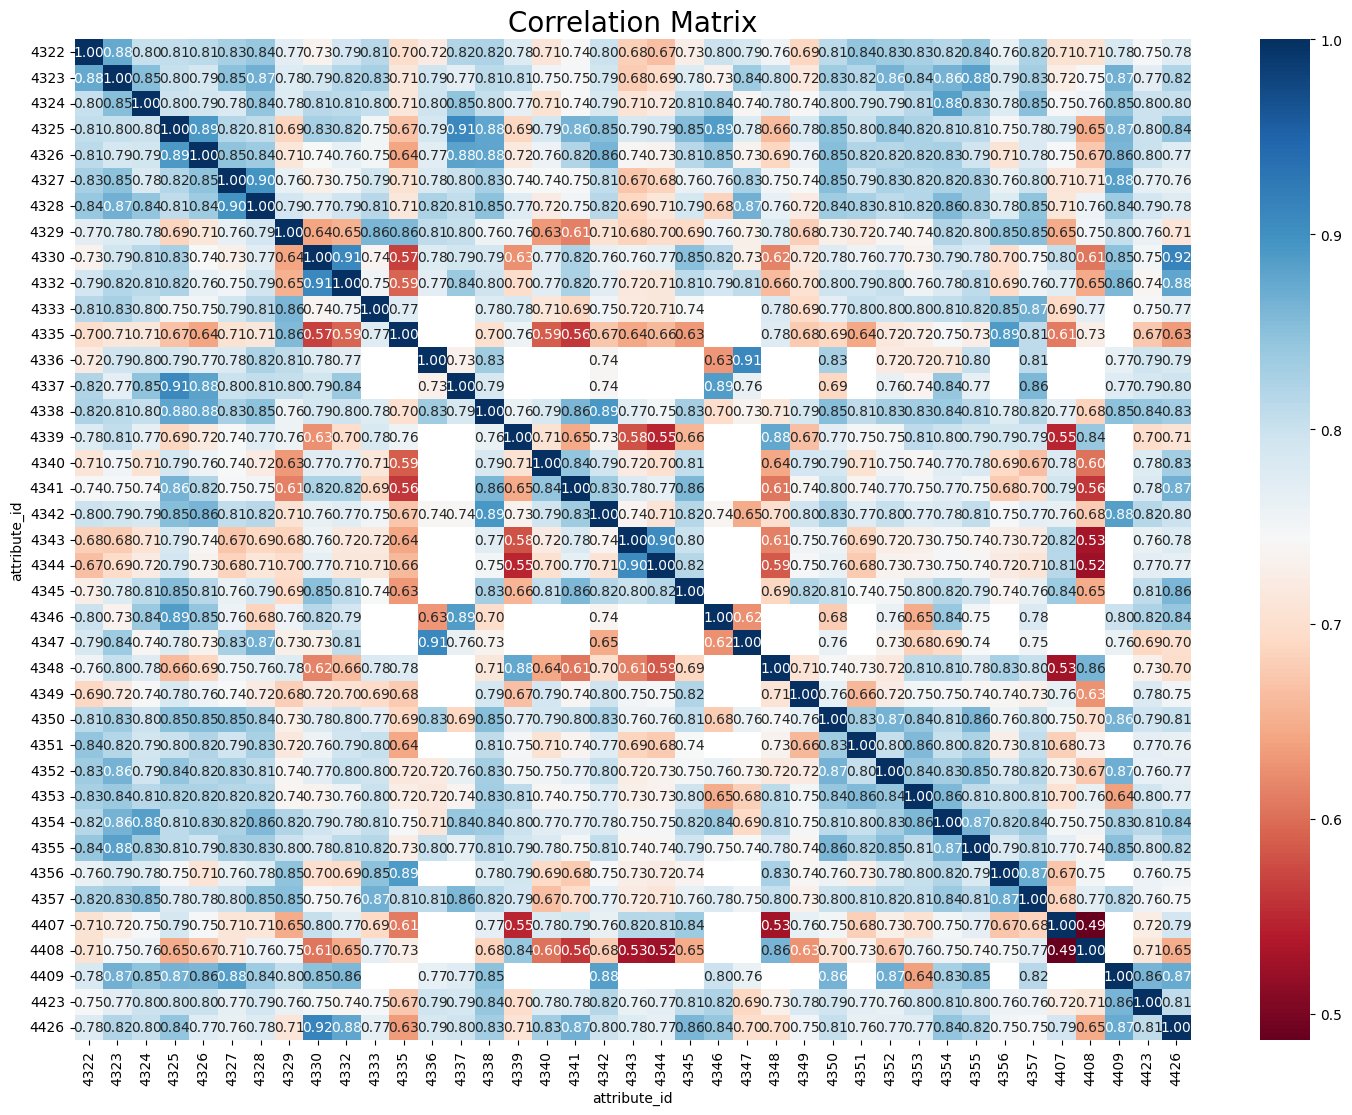

In [149]:
pt[num_cols].corr()

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(pt[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="RdBu")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [150]:

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(pt, "potential_label", col)


attribute_id          4322
potential_label           
average          57.211864
highlighted      63.393443


attribute_id          4323
potential_label           
average          57.996469
highlighted      62.131148


attribute_id          4324
potential_label           
average          54.935734
highlighted      59.786885


attribute_id          4325
potential_label           
average          54.345339
highlighted      65.827869


attribute_id          4326
potential_label           
average          54.057910
highlighted      64.295082


attribute_id          4327
potential_label           
average          55.836864
highlighted      59.606557


attribute_id          4328
potential_label           
average          57.382768
highlighted      61.590164


attribute_id          4329
potential_label           
average          59.060734
highlighted      60.959016


attribute_id          4330
potential_label           
average          55.603814
highlighted      59.877049


attribute_

 ## Feature Üretme

In [151]:
pt["min"] = pt[num_cols].min(axis=1)
pt["max"] = pt[num_cols].max(axis=1)
pt["sum"] = pt[num_cols].sum(axis=1)
pt["mean"] = pt[num_cols].mean(axis=1)
pt["median"] = pt[num_cols].median(axis=1)

pt["mentality"] = pt["position_id"].apply(lambda x: "defender" if (x == 2) | (x == 3) | (x == 4) | (x == 5) else "attacker")

for i in num_cols:
    threshold = pt[i].mean() + pt[i].std()
    lst = pt[i].apply(lambda x: 0 if x < threshold else 1)
    pt[str(i) + "_FLAG"] = lst


flagCols = [col for col in pt.columns if "_FLAG" in col]

pt["counts"] = pt[flagCols].sum(axis=1)

pt["countRatio"] = pt["counts"] / len(flagCols)

pt.head()

pt[pt["counts"] == 0]["potential_label"].value_counts()
# average        97
# highlighted    15

pt[pt["counts"] != 0]["potential_label"].value_counts()

potential_label
average        236
highlighted     61
Name: count, dtype: int64

In [152]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


labelEncoderCols = ["potential_label", "mentality"]

for col in labelEncoderCols:
    pt = label_encoder(pt, col)


In [153]:

pt.head()
lst = ["counts", "countRatio","min","max","sum","mean","median"]
num_cols = list(num_cols)

for i in lst:
    num_cols.append(i)

scaler = StandardScaler()
pt[num_cols] = scaler.fit_transform(pt[num_cols])

pt.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4336,4337,4338,4339,4340,4341,4342,4343,4344,4345,4346,4347,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4409,4423,4426,min,max,sum,mean,median,mentality,4322_FLAG,4323_FLAG,4324_FLAG,4325_FLAG,4326_FLAG,4327_FLAG,4328_FLAG,4329_FLAG,4330_FLAG,4332_FLAG,4333_FLAG,4335_FLAG,4336_FLAG,4337_FLAG,4338_FLAG,4339_FLAG,4340_FLAG,4341_FLAG,4342_FLAG,4343_FLAG,4344_FLAG,4345_FLAG,4346_FLAG,4347_FLAG,4348_FLAG,4349_FLAG,4350_FLAG,4351_FLAG,4352_FLAG,4353_FLAG,4354_FLAG,4355_FLAG,4356_FLAG,4357_FLAG,4407_FLAG,4408_FLAG,4409_FLAG,4423_FLAG,4426_FLAG,counts,countRatio
0,1355710,7,0,-0.551853,-0.564068,-1.373324,-0.420463,-0.750787,-0.800518,-0.900458,-0.793566,-0.425554,-0.123102,-1.223858,-1.035633,NaN,NaN,-1.103530,-1.009285,-0.541797,-0.690375,-0.500625,-1.067288,-1.205671,-1.004927,NaN,NaN,-1.313773,-1.041775,-0.677205,-0.435633,0.012634,-1.326094,-1.100828,-0.462608,-1.234869,-1.496725,-0.142650,-1.487256,NaN,-0.951495,-0.236094,-1.028269,-1.077232,-0.843165,-0.956408,-0.742190,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.880436,-0.880436
1,1356362,9,0,0.588985,0.551135,0.693039,0.697843,0.729193,0.716253,0.594990,0.414580,0.748342,0.692394,0.459154,0.996474,NaN,NaN,0.641050,0.840464,0.911936,0.799406,0.614518,1.229965,0.749536,0.742305,NaN,NaN,0.878802,0.669953,0.839803,0.716763,0.788972,0.802824,1.054859,0.652406,0.914913,0.759759,0.529664,0.668713,NaN,0.415895,1.052480,1.052399,0.676653,0.910938,0.836576,0.851283,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,-0.398576,-0.398576
2,1356375,3,0,0.588985,0.551135,0.693039,0.697843,0.729193,0.716253,0.594990,1.018652,0.748342,0.692394,1.132359,0.319105,NaN,NaN,0.641050,0.840464,0.911936,0.799406,0.614518,0.573607,0.749536,0.742305,NaN,NaN,0.878802,0.669953,0.081299,0.716763,0.788972,0.802824,1.054859,0.652406,0.914913,0.759759,0.529664,0.668713,NaN,0.415895,1.052480,1.052399,0.676653,0.887705,0.812828,0.851283,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,-0.237956,-0.237956
3,1356375,4,0,0.588985,1.294603,0.693039,0.697843,0.729193,1.474638,1.342715,1.018652,-0.034255,0.692394,0.459154,0.996474,NaN,NaN,1.338882,1.580363,0.185069,0.799406,0.614518,-0.082751,0.097800,0.043412,NaN,NaN,0.878802,1.354645,0.839803,0.716763,1.565309,0.802824,0.438949,0.652406,0.198319,0.759759,-0.142650,0.668713,NaN,-0.267800,-0.236094,0.358843,0.676653,0.818005,0.741584,0.851283,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0.404525,0.404525
4,1356411,9,0,0.588985,0.551135,1.381827,1.443380,0.729193,0.716253,0.594990,0.414580,2.313536,1.507891,0.459154,0.996474,NaN,NaN,0.641050,0.100564,0.185069,0.799406,1.357946,0.573607,0.749536,0.742305,NaN,NaN,0.252352,1.354645,0.081299,0.716763,0.788972,0.093185,0.438949,0.652406,0.198319,0.759759,1.874292,-0.049944,NaN,1.099590,1.052480,1.052399,1.553596,0.934171,0.860324,0.851283,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0.565145,0.565145


 Görev 8: Elimizdeki veri seti üzerinden minimum hata ile futbolcuların potansiyel etiketlerini tahmin eden bir makine öğrenmesi modeli geliştiriniz.


In [154]:
pt.isnull().sum().count()

89

In [163]:
import warnings
warnings.filterwarnings("ignore")

y = pt["potential_label"]
X = pt.drop(["potential_label", "player_id"], axis=1)


models = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   #("SVC", SVC()),
                   #("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   #('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   #('CatBoost', CatBoostClassifier(verbose=False)),
              ("LightGBM", LGBMClassifier())]

for name, model in models:
    print(name)
    for score in ["roc_auc", "f1", "precision", "recall", "accuracy"]:
        cvs = cross_val_score(model, X, y, scoring=score, cv=10).mean()
        print(score+" score:"+str(cvs))
    print("##############################")

    

LR


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 921, in check_array
    _assert_all_finite(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [161]:
lgbm_model = LGBMClassifier(random_state=46)

first_rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))

lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500],
               "colsample_bytree": [0.5, 0.7, 1]
             }

lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=False).fit(X, y)

# normal y cv süresi: 16.2s
# scale edilmiş y ile: 13.8s

lgbm_gs_best.best_params_
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X, y)

final_rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))
print("İlk RMSE:", first_rmse)
print("Final RMSE:", final_rmse)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


İlk RMSE: 0.3271662553083932
Final RMSE: 0.35124705804671175


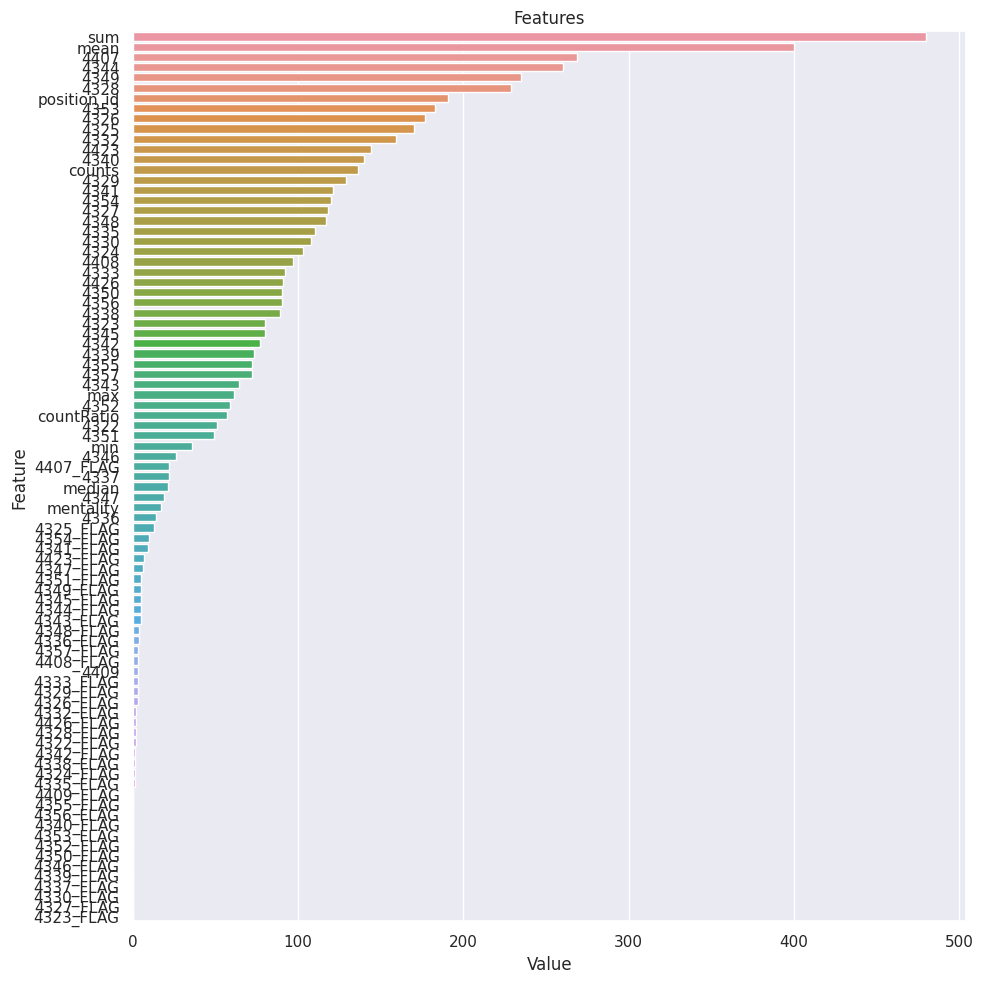

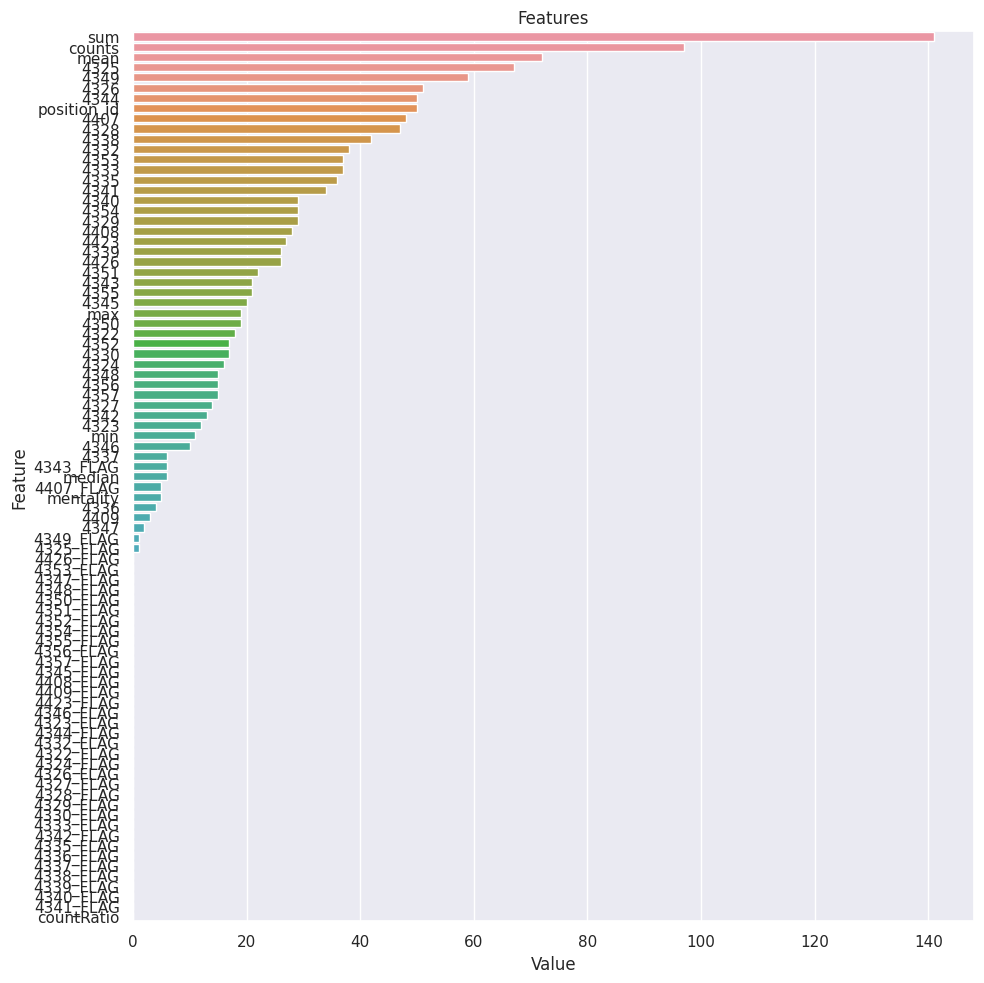

In [166]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")


plot_importance(final_model, X)


# Hiperparametre opt. olmasa importancelar
model = LGBMClassifier()
model.fit(X, y)
plot_importance(model, X)
